<b>Ahmad Zaini Zahrandika </b> <br>
<b>20923302 </b> <br>
<b>Research-based Learning </b> <br>

# Pumpkin Seeds Classification with Machine Learning

## Explanation for methods

### Support Vector Machine (SVM)

Support vector machines predicted a suitable hyperplane function to statistically separate two classes on the multidimensional plane.

### k-Nearest Neighbors (k-NN)

The k-NN or k-nearest neighbor algorithm determined the nearest k points in the same space with each data in the training set, usually by considering the Euclidean distance.

### Random Forest (RF)

The random forest classifier classified many random samples, which were sampled independently of the input vector by considering the combination of predictors that received the highest vote from all the tree estimators.

### Logistic Regression (LR)

Logistic regression is a statistical method used to analyze a dataset with independent variables to determine an outcome. It constructs a dividing hyper-plane between two data sets and provides a functional form and parameter vector to express the probability of a certain outcome given the input variables.

### k-Fold Cross-Validation

Cross-validation is a statistical method used to assess the performance and generalizability of machine learning models. It helps prevent issues like overfitting and provides a more reliable estimate of a model"s performance on unseen data. The dataset was divided into k parts, and the k-1 part was used as train data. This process was repeated k times, and the average of the accuracy value found in each iteration was accepted as the performance of cross-validation.

### Feature Scaling

No | Scaler | Formula | Explanation
:- | :- | :- | :-
1 | StandardScaler | $z = \frac{x - \mu}{\sigma}$ | This scaler standardizes the data by removing the mean and scaling it to unit variance.
2 | MinMaxScaler | $x" = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$ | This scaler scales the data to a specific range, typically [0, 1].

### Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classification model by comparing the predicted outcomes to the actual outcomes. It is particularly useful for assessing models on imbalanced datasets or when multiple classes are involved.

| | **Predicted Positive** | **Predicted Negative** 
:- | :- | :-
| **Actual Positive** | True Positive ($tp$)  | False Negative ($fn$)     
| **Actual Negative** | False Positive ($fp$) | True Negative ($tn$)

In this RBL, $0$ is positive, $1$ is negative.

| | **Predicted $0$** | **Predicted $1$** 
:- | :- | :-
| **Actual $0$** | True Positive ($tp$)  | False Negative ($fn$)     
| **Actual $1$** | False Positive ($fp$) | True Negative ($tn$)

### Performance Criteria, Formula, and Evaluation Condition Table

No | Performance Measure | Formula | Evaluation
:- | :- | :- | :-
1 | Accuracy | $\frac{tp+tn}{tp+fp+tn+fn}$ | The ratio of correct estimates to the total is the number of samples evaluated.
2 | Precision | $\frac{tp}{tp+fp}$ | It is used to measure the positive patterns that are correctly predicted </br> from the total predictive forms in a positive class.
3 | Recall | $\frac{tp}{tp+fn}$ | Used to measure the proportion of correctly classified positive patterns.
4 | F-score | $\frac{2tp}{2tp+fp+fn}$ | Represents the harmonic mean between Recall and Precision values.

## Features in the dataset

No | Name
:- | :- |
1 | Area (A)
2 | Perimeter (p)
3 | Major Axis Length (Maj.AL)
4 | Minor Axis Length (Min.AL)
5 | Eccentricity (e)
6 | Convex Area (CA)
7 | Extent (E)
8 | Equiv Diameter (ED)
9 | Compactness (C)
10 | Solidity (s)
11 | Roundness (r)
12 | Aspect Ratio (AR)

## Program Code

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC # SVM
from sklearn.neighbors import KNeighborsClassifier # k-NN
from sklearn.ensemble import RandomForestClassifier # RF
from sklearn.linear_model import LogisticRegression # LR

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load the dataset
df = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [3]:
# Check the features of the data. There are 13 of them.
# The only feature with categorical type is "Class".

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ration', 'Compactness', 'Class']


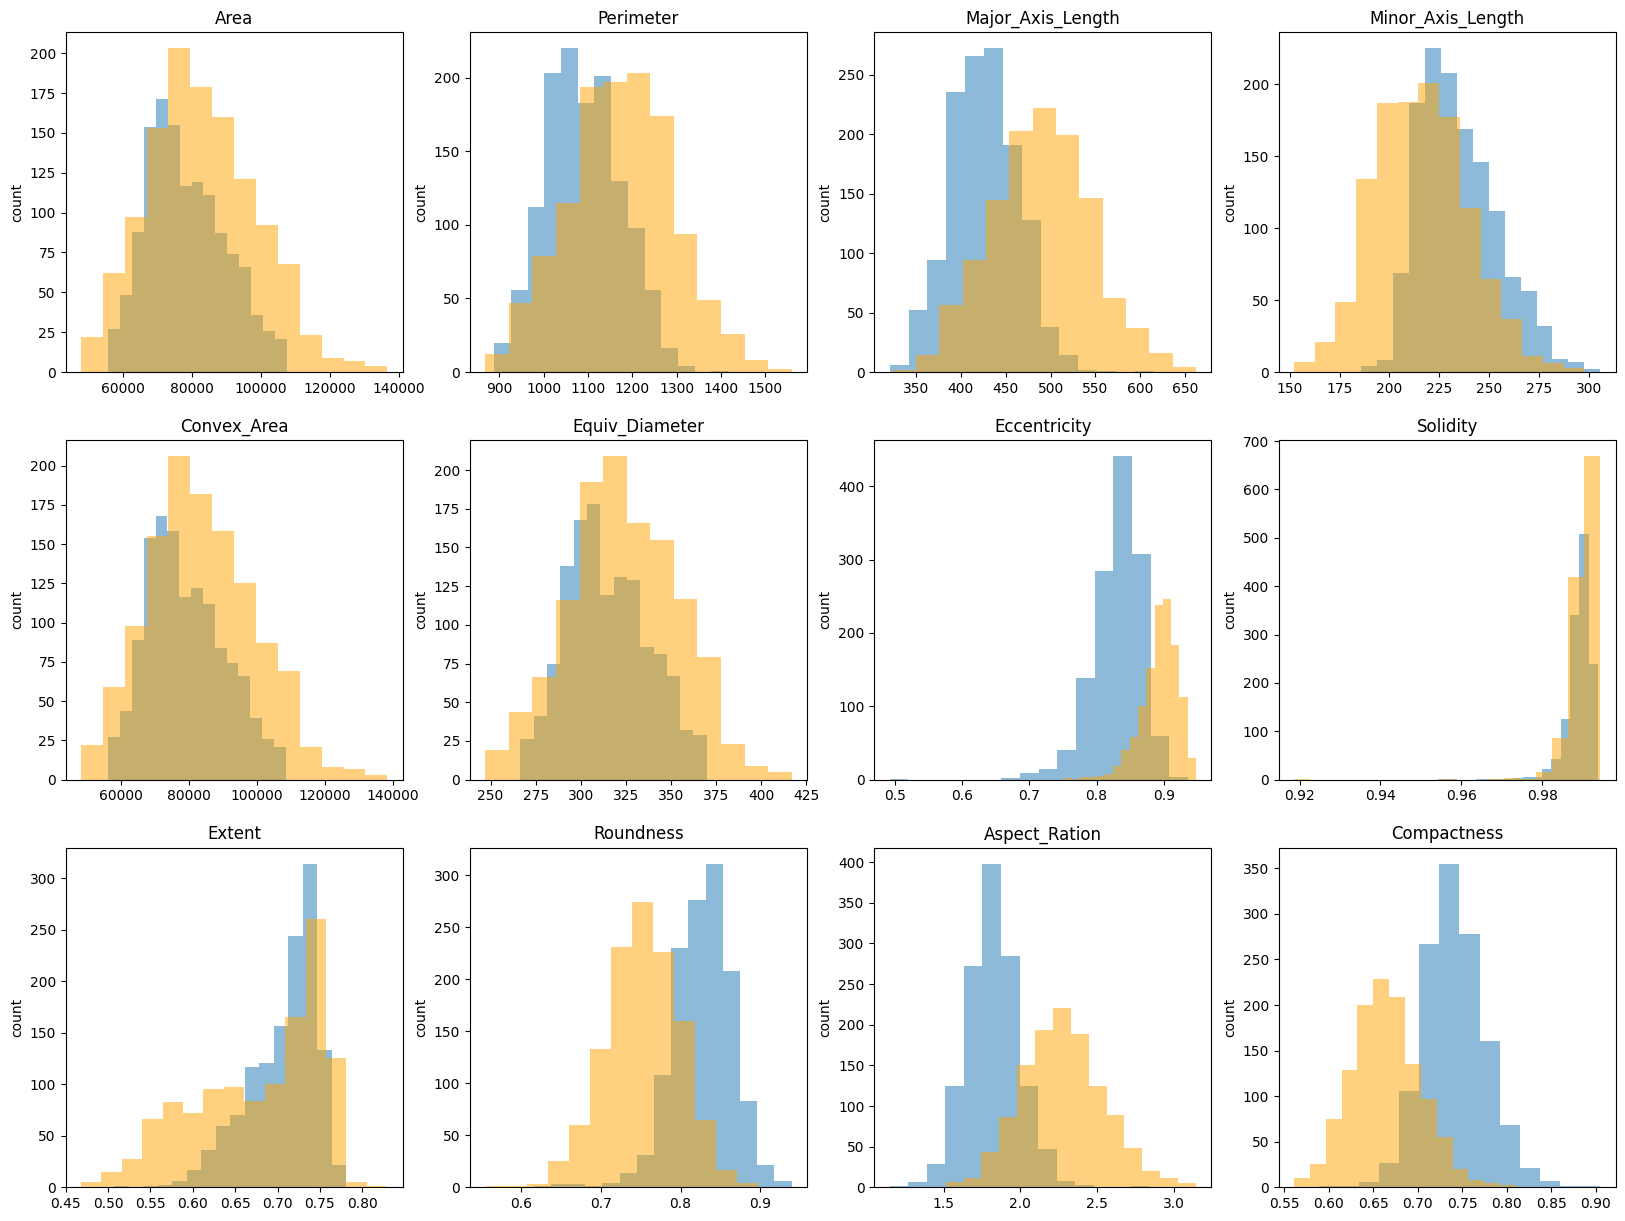

In [4]:
# Histogram for plots

df_cerce = df[df["Class"] == "Çerçevelik"]
df_urgup = df[df["Class"] == "Ürgüp Sivrisi"]
df_urgup = df_urgup.reset_index(drop=True)

feature_list = df.columns.tolist()
print(feature_list)


plt.figure(figsize=(20,15))

for i in range(len(feature_list)-1):
    plt.subplot(3, 4, i+1)
    plt.hist(df_cerce[feature_list[i]], bins="doane", alpha=0.5)
    plt.hist(df_urgup[feature_list[i]], bins="doane", color="orange", alpha=0.5)
    plt.title(feature_list[i])
    plt.ylabel("count")

plt.savefig("seeds.png", bbox_inches = "tight", dpi=300)
#df_urgup

In [5]:
# Convert "Class" labels to numerical data.
# Then, split the data. X denotes input data, Y denotes the target data.

seed_type = {"Çerçevelik": 0, "Ürgüp Sivrisi": 1}
df["Class"] = df["Class"].map(seed_type)

X = df.drop(columns=["Class"])
y = df["Class"]

print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


Best Parameters: {'scaler': StandardScaler(), 'svc__C': 1, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}
Best Cross-Validation Score: 0.8891428571428571
Accuracy: 0.8760

Classification Report:
              precision    recall  f1-score   support

           0     0.8667    0.9000    0.8830       390
           1     0.8870    0.8500    0.8681       360

    accuracy                         0.8760       750
   macro avg     0.8768    0.8750    0.8756       750
weighted avg     0.8764    0.8760    0.8759       750



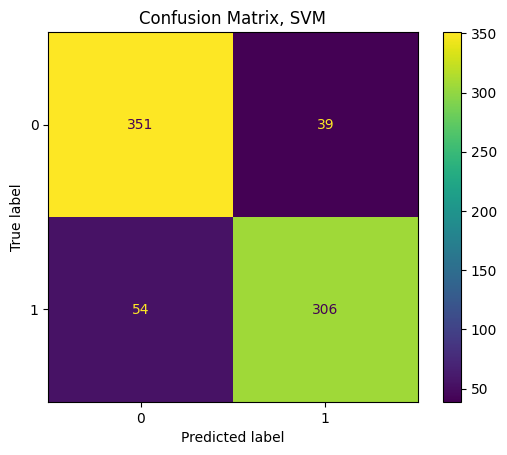

In [6]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a pipeline with a placeholder for the scaler and the SVC model
pipeline = Pipeline([
    ("scaler", "passthrough"),  # Placeholder for scaler
    ("svc", SVC())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    "scaler": [StandardScaler(), MinMaxScaler()],
    "svc__C": [0.1, 1, 10, 100],
    "svc__kernel": ["linear", "rbf", "sigmoid"],
    "svc__gamma": ["auto", 1/100]
}

# Perform GridSearchCV with 5-fold cross-validation on the training set
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Display best parameters and score from GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="viridis")
plt.title("Confusion Matrix, SVM")
plt.savefig("cf_SVM.png", bbox_inches = "tight", dpi=300)

# Compute and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

# Print the classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 20, 'scaler': StandardScaler()}
Best Cross-Validation Score: 0.885142857142857
Accuracy: 0.8733

Classification Report:
              precision    recall  f1-score   support

           0     0.8537    0.9128    0.8823       390
           1     0.8979    0.8306    0.8629       360

    accuracy                         0.8733       750
   macro avg     0.8758    0.8717    0.8726       750
weighted avg     0.8749    0.8733    0.8730       750



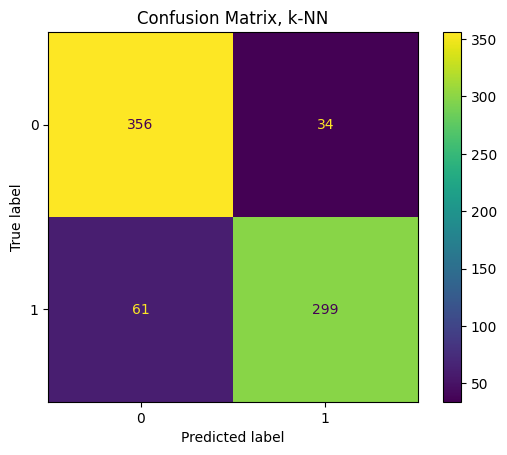

In [7]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a pipeline with a placeholder for the scaler and the k-NN model
pipeline = Pipeline([
    ("scaler", "passthrough"),  # Placeholder, to be replaced during grid search
    ("knn", KNeighborsClassifier())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    "scaler": [StandardScaler(), MinMaxScaler()],
    "knn__n_neighbors": [5, 10, 15, 20],
    "knn__metric": ["euclidean", "cosine", "manhattan"]
}

# Perform GridSearchCV with 5-fold cross-validation on the training set
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Display best parameters and score from GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="viridis")
plt.title("Confusion Matrix, k-NN")
plt.savefig("cf_kNN.png", bbox_inches = "tight", dpi=300)

# Compute and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

# Print the classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

C:\Users\LENOVO\miniconda3\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'rf__criterion': 'gini', 'rf__n_estimators': 100, 'scaler': MinMaxScaler()}
Best Cross-Validation Score: 0.8942857142857144
Accuracy: 0.8720

Classification Report:
              precision    recall  f1-score   support

           0     0.8750    0.8795    0.8772       390
           1     0.8687    0.8639    0.8663       360

    accuracy                         0.8720       750
   macro avg     0.8719    0.8717    0.8718       750
weighted avg     0.8720    0.8720    0.8720       750



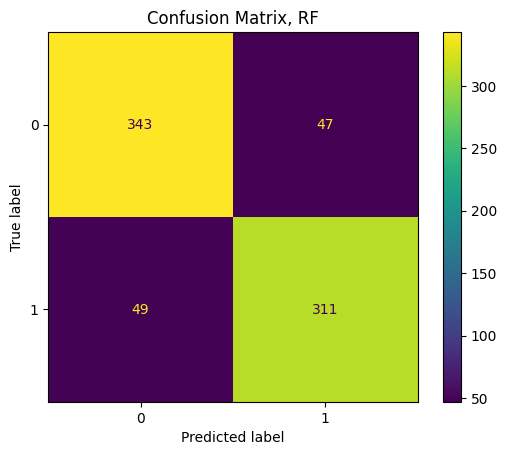

In [8]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a pipeline with a placeholder for the scaler and the RF model
pipeline = Pipeline([
    ("scaler", "passthrough"),  # Placeholder, to be replaced during grid search
    ("rf", RandomForestClassifier())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    "scaler": [StandardScaler(), MinMaxScaler()],
    "rf__criterion" : ["gini", "entropy", "log_loss"],
    "rf__n_estimators": [10, 20, 50, 75, 100]
}

# Perform GridSearchCV with 5-fold cross-validation on the training set
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Display best parameters and score from GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="viridis")
plt.title("Confusion Matrix, RF")
plt.savefig("cf_RF.png", bbox_inches = "tight", dpi=300)

# Compute and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

# Print the classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

C:\Users\LENOVO\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\LENOVO\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: T

Best Parameters: {'lr__C': 100, 'lr__max_iter': 5000, 'lr__solver': 'saga', 'scaler': StandardScaler()}
Best Cross-Validation Score: 0.8868571428571428
Accuracy: 0.8733

Classification Report:
              precision    recall  f1-score   support

           0     0.8606    0.9026    0.8811       390
           1     0.8886    0.8417    0.8645       360

    accuracy                         0.8733       750
   macro avg     0.8746    0.8721    0.8728       750
weighted avg     0.8740    0.8733    0.8731       750



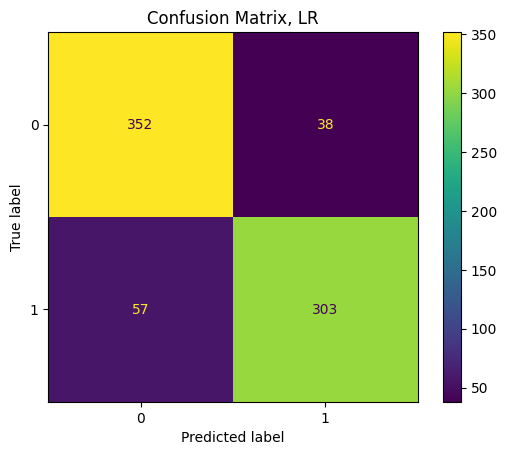

In [9]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a pipeline with a placeholder for the scaler and the LR model
pipeline = Pipeline([
    ("scaler", "passthrough"),  # Placeholder, to be replaced during grid search
    ("lr", LogisticRegression())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    "scaler": [StandardScaler(), MinMaxScaler()],
    "lr__C": [0.01, 0.1, 1, 10, 100],                     
    "lr__solver": ["liblinear", "saga", "lbfgs", "newton-cg"],
    "lr__max_iter": [1000, 5000, 10000]
}

# Perform GridSearchCV with 5-fold cross-validation on the training set
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Display best parameters and score from GridSearchCV
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="viridis")
plt.title("Confusion Matrix, LR")
plt.savefig("cf_LR.png", bbox_inches = "tight", dpi=300)

# Compute and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

# Print the classification report (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))